# Craft a Story from a Dataset Exercise

Exercise Steps
1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor during your next call

Example questions to ask when exploring the data
- Can I count something interesting?
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can I make a bar plot or a histogram?
- Can I compare two related quantities? 
- Can I make a scatterplot?
- Can I make a time-series plot?
- Looking at the plots, what are some insights I can make?
- Can I see any correlations?
- Is there a hypothesis I can - and should - investigate further?
- What other questions are the insights leading me to ask? 

Submission: 
- Submit links to a GitHub repository containing a Jupyter Notebook or a
PowerPoint. 
- The file should contain:
    - The questions you asked
    - The trends you investigated
    - The resulting visualizations and conclusions 

In [1]:
# library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp

In [2]:
# Load the chosen dataset
'''
Data sourced from https://www.kaggle.com/datasets/rtatman/animal-bites
'''

file_path1 = "/Users/frankyaraujo/Development/springboard_main/GitHubDir/\
Springboard/Springboard - Unit 20.3 - Craft a Story from a Dataset/Health_AnimalBites.csv"

df1 = pd.read_csv(file_path1)

### Health_AnimalBites
#### "**About Dataset**

 **Context:**
- In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

 **Content:**
- Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.

- bite_date: The date the bite occurred
- SpeciesIDDesc: The species of animal that did the biting
- BreedIDDesc: Breed (if known)
- GenderIDDesc: Gender (of the animal)
- color: color of the animal
- vaccination_yrs: how many years had passed since the last vaccination
- vaccination_date: the date of the last vaccination
- victim_zip: the zipcode of the victim
- AdvIssuedYNDesc: whether advice was issued
- WhereBittenIDDesc: Where on the body the victim was bitten
- quarantine_date: whether the animal was quarantined
- DispositionIDDesc: whether the animal was released from quarantine
- head_sent_date: the date the animal’s head was sent to the lab
- release_date: the date the animal was released
- ResultsIDDesc: results from lab tests (for rabies)


 **Acknowledgements:**
- Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. This data is in the public domain."

From https://www.kaggle.com/datasets/rtatman/animal-bites

In [3]:
df1.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


There are missing values - Let's see how much of the data is missing.

In [5]:
missing_percentages_df1 = pd.DataFrame(df1.isna().sum()/df1.shape[0]*100, columns=["%_missing"])
missing_percentages_df1.sort_values(by="%_missing", ascending=False)

,%_missing
head_sent_date,95.612574
release_date,83.949795
DispositionIDDesc,82.950128
ResultsIDDesc,82.861268
quarantine_date,77.563035
AdvIssuedYNDesc,71.509497
vaccination_yrs,58.480506
BreedIDDesc,58.247251
vaccination_date,54.293013
color,28.623792


Too many missing values - let's try another dataset that is more complete. 

### Adult income datas

#### About Dataset
**1994 Census Data - Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))**


An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **class**: >50K, <=50K


In [6]:
# Load the chosen dataset
'''
Data sourced from https://www.kaggle.com/datasets/wenruliu/adult-income-dataset/code
'''

file_path2 = "/Users/frankyaraujo/Development/springboard_main/GitHubDir/\
Springboard/Springboard - Unit 20.3 - Craft a Story from a Dataset/adult.csv"

df2 = pd.read_csv(file_path2)

In [7]:
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
missing_percentages_df2 = pd.DataFrame(df2.isna().sum()/df2.shape[0]*100, columns=["%_missing"])
missing_percentages_df2.sort_values(by="%_missing", ascending=False)

,%_missing
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
educational-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
gender,0.0


# Exploring The Data

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
df2.select_dtypes("object")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [11]:
df2.select_dtypes("int")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [12]:
df2.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Numerical Features

In [13]:
df2_numerical = df2.select_dtypes("int").copy()

In [14]:
df2_numerical.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


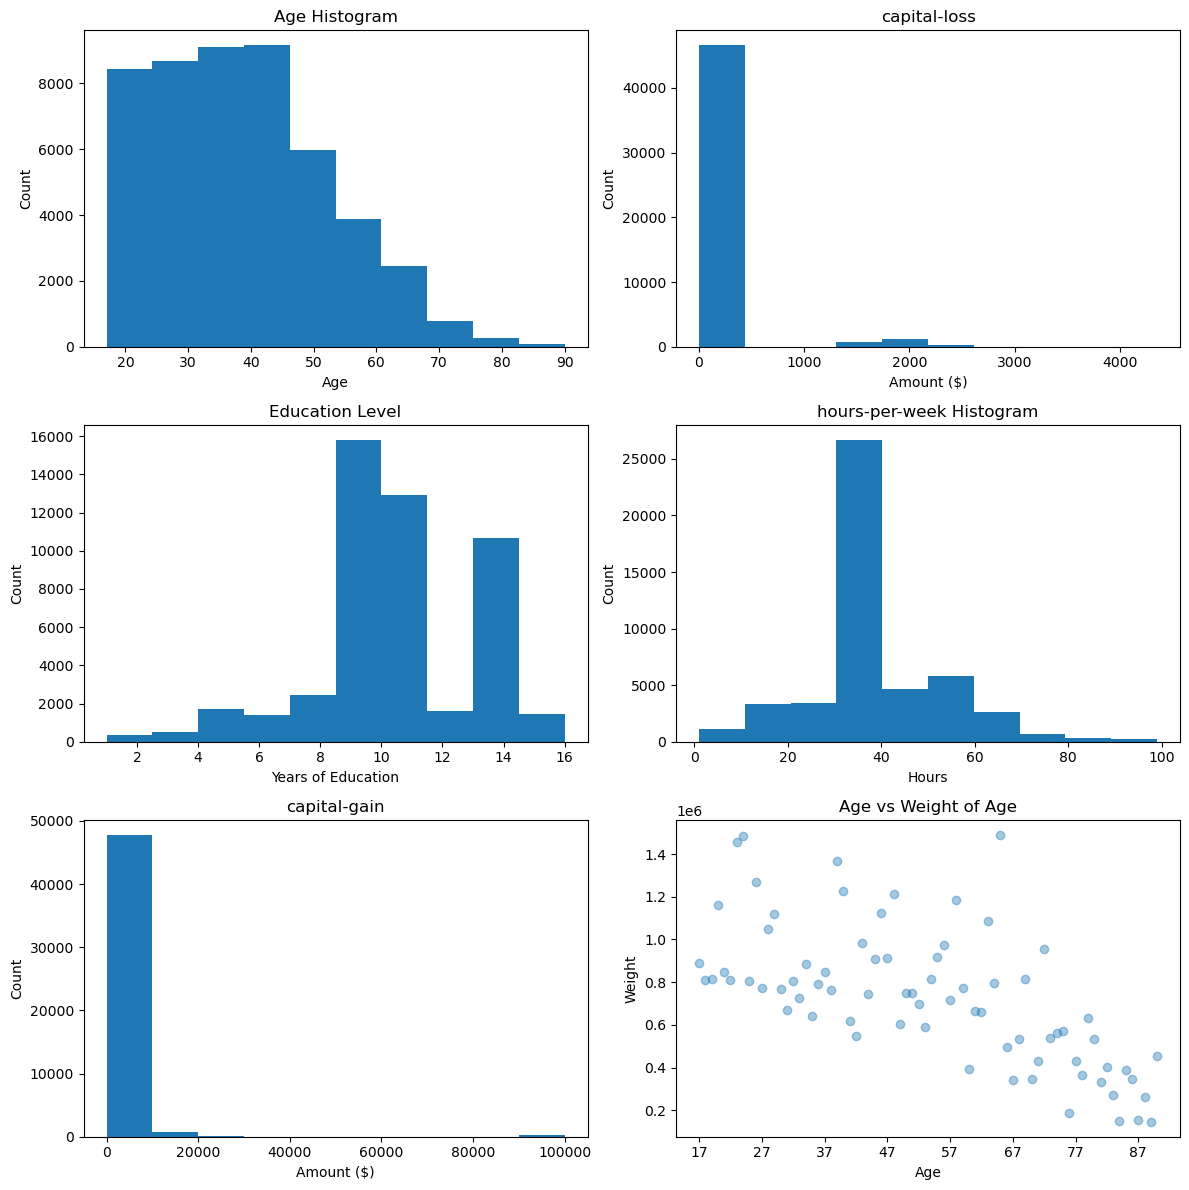

In [15]:
fig, ax = plt.subplots(3,2, figsize=(12,12))

ax[0, 0].hist(df2_numerical["age"])
ax[0, 0].set_title('Age Histogram')
ax[0, 0].set_ylabel("Count")
ax[0, 0].set_xlabel("Age")

ax[1, 0].hist(df2_numerical["educational-num"])
ax[1, 0].set_title('Education Level')
ax[1, 0].set_ylabel("Count")
ax[1, 0].set_xlabel("Years of Education")

ax[2, 0].hist(df2_numerical["capital-gain"])
ax[2, 0].set_title('capital-gain')
ax[2, 0].set_ylabel("Count")
ax[2, 0].set_xlabel("Amount ($)")

ax[0, 1].hist(df2_numerical["capital-loss"])
ax[0, 1].set_title('capital-loss')
ax[0, 1].set_ylabel("Count")
ax[0, 1].set_xlabel("Amount ($)")

ax[1, 1].hist(df2_numerical["hours-per-week"])
ax[1, 1].set_title('hours-per-week Histogram')
ax[1, 1].set_ylabel("Count")
ax[1, 1].set_xlabel("Hours")

ax[2, 1].scatter(df2_numerical["age"].unique(), df2_numerical.groupby("age").agg(np.max)["fnlwgt"], alpha=.4)
ax[2, 1].set_title('Age vs Weight of Age')
ax[2, 1].set_ylabel("Weight")
ax[2, 1].set_xlabel("Age")
ax[2,1].set_xticks(range(np.min(df2_numerical["age"]),np.max(df2_numerical["age"]),10))

fig.tight_layout()
plt.show()

### Categorical Features

In [16]:
df2_categorical = df2.select_dtypes("object").copy()

In [17]:
df2_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


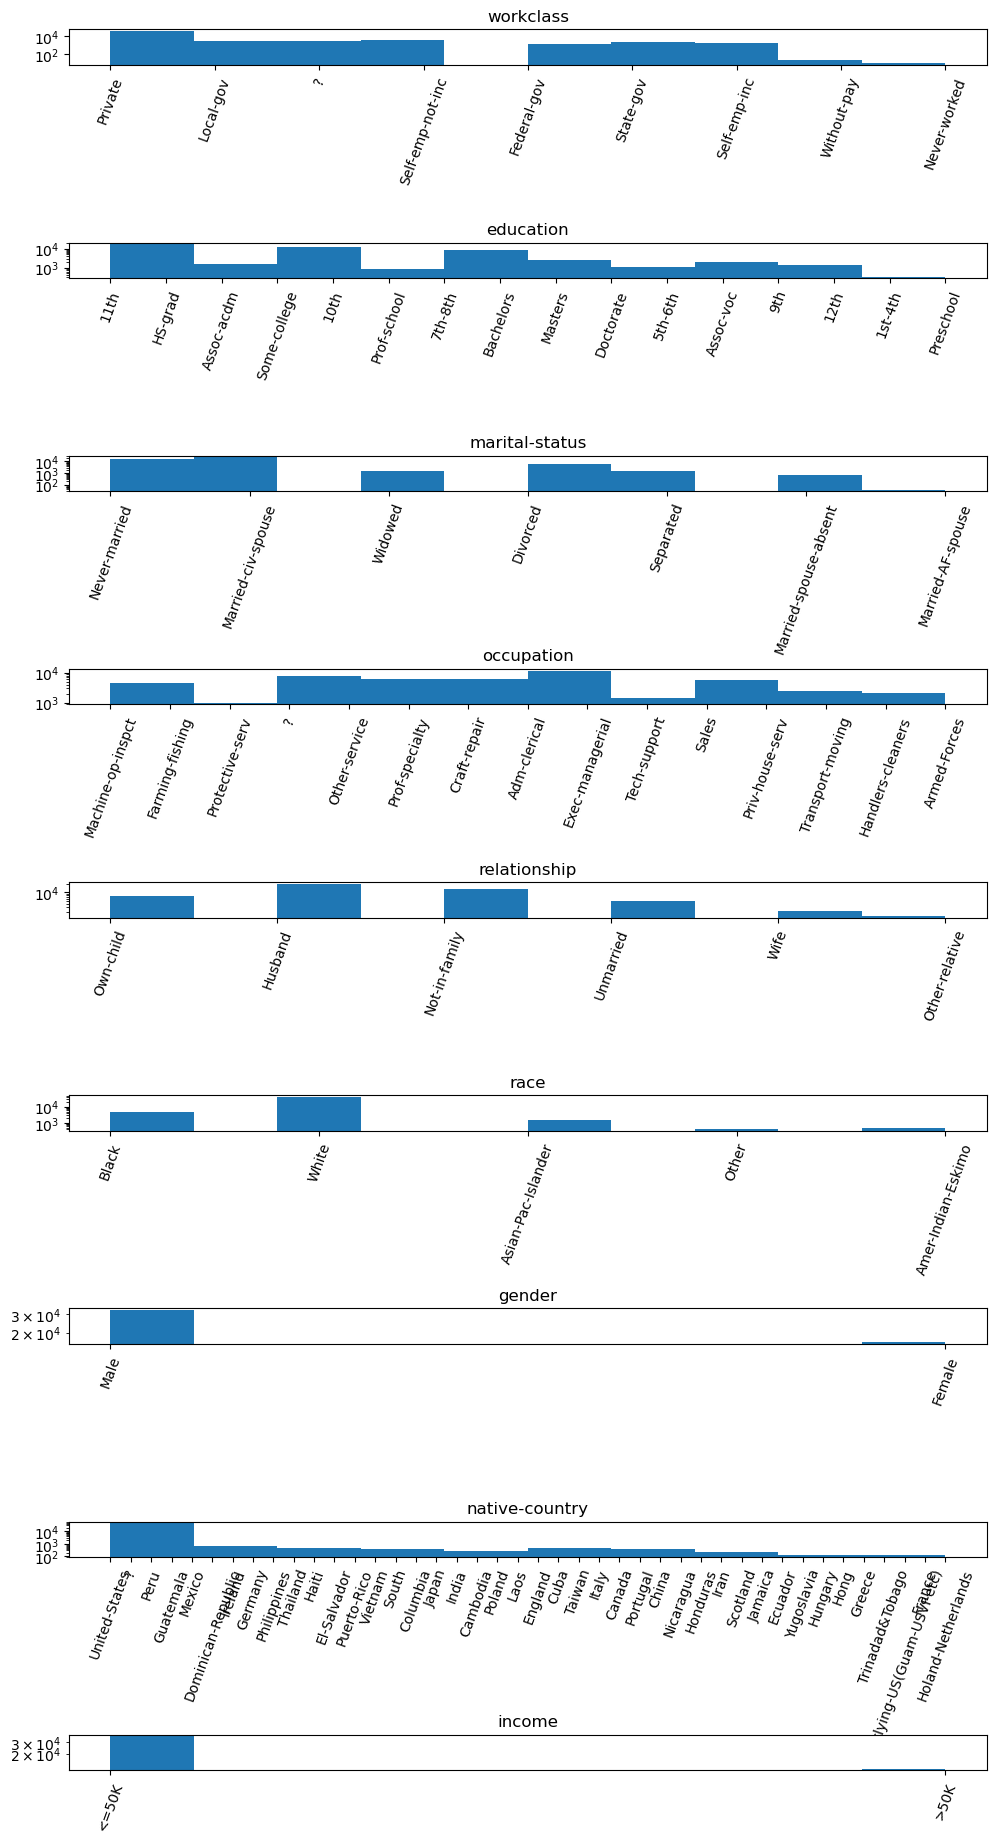

In [18]:

fig, ax1 = plt.subplots(9, 1, figsize=(10, 18))
fig.tight_layout() 
plt.subplots_adjust(hspace=5)  # Adjust the value of hspace to increase or decrease the vertical space

for plot_num, col in enumerate(df2_categorical.columns):
    ax1[plot_num].hist(df2_categorical[col])
    ax1[plot_num].set_title(col)
    ax1[plot_num].set_yscale("log")

    # Rotate x-axis tick labels
    ax1[plot_num].tick_params(axis='x', rotation=70)

plt.show()


### Divorced = True


In [33]:
df2_divorced_separated = df2[df2["marital-status"].isin(["Divorced","Separated"])]

In [34]:
df2_divorced_separated.shape

(8163, 15)

In [35]:
df2_divorced_separated["marital-status"].unique()

array(['Divorced', 'Separated'], dtype=object)

In [48]:
df2_divorced_separated.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
27,23,Private,134446,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Male,0,0,54,United-States,<=50K
34,26,Private,43311,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
48,52,Private,201062,11th,7,Separated,Priv-house-serv,Not-in-family,Black,Female,0,0,18,United-States,<=50K
51,39,Private,280215,HS-grad,9,Divorced,Handlers-cleaners,Own-child,Black,Male,0,0,40,United-States,<=50K


In [54]:
df2_divorced_separated["occupation"].replace(to_replace="?",value="Unknown",inplace=True)

/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_2919/2989116657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_divorced_separated["occupation"].replace(to_replace="?",value="Unknown",inplace=True)


In [59]:
df2_divorced_separated.rename(
    columns={"workclass":"work_type","educational-num":"number_of_years_of_education"},
    inplace=True)

/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_2919/741031977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_divorced_separated.rename(


In [61]:
df2_divorced_separated["work_type"].replace(to_replace="?",value="Unknown",inplace=True)

/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_2919/4044528245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_divorced_separated["work_type"].replace(to_replace="?",value="Unknown",inplace=True)


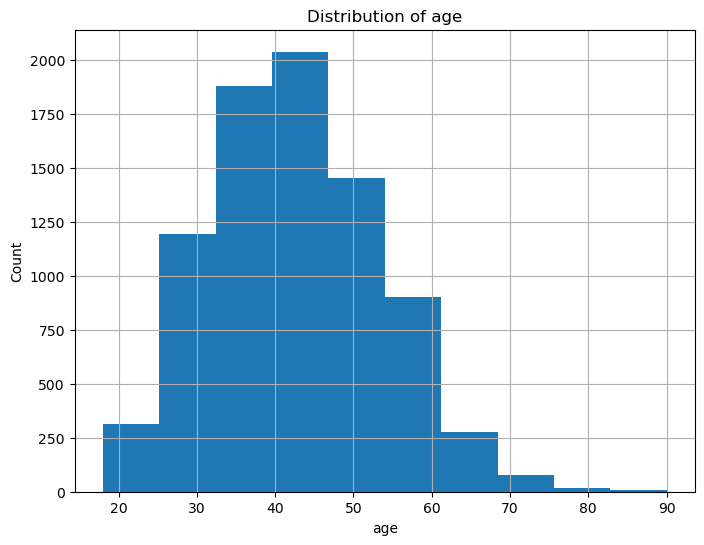

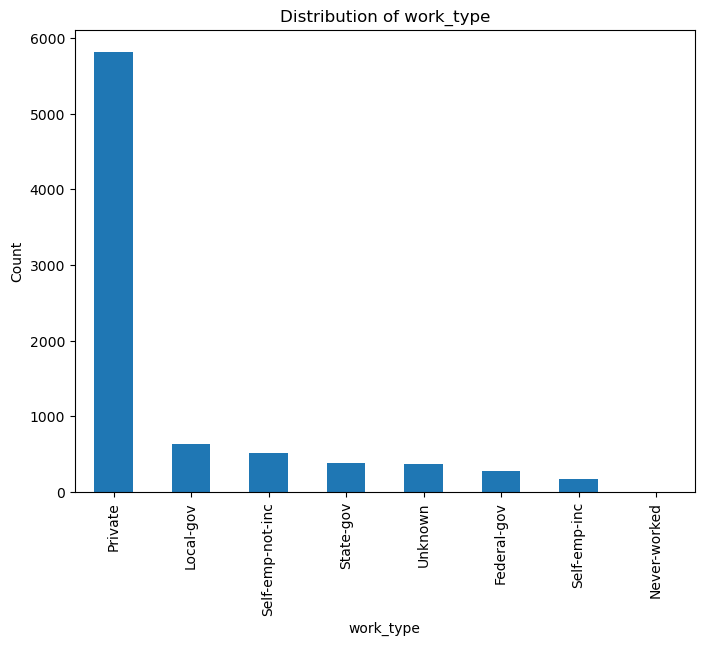

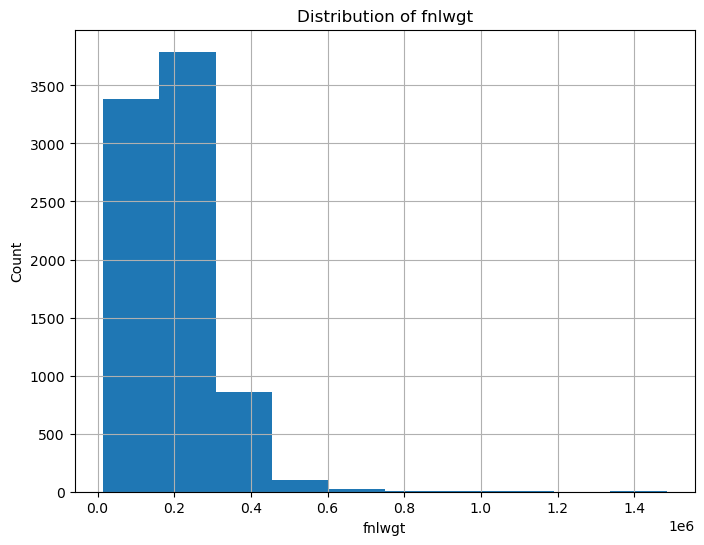

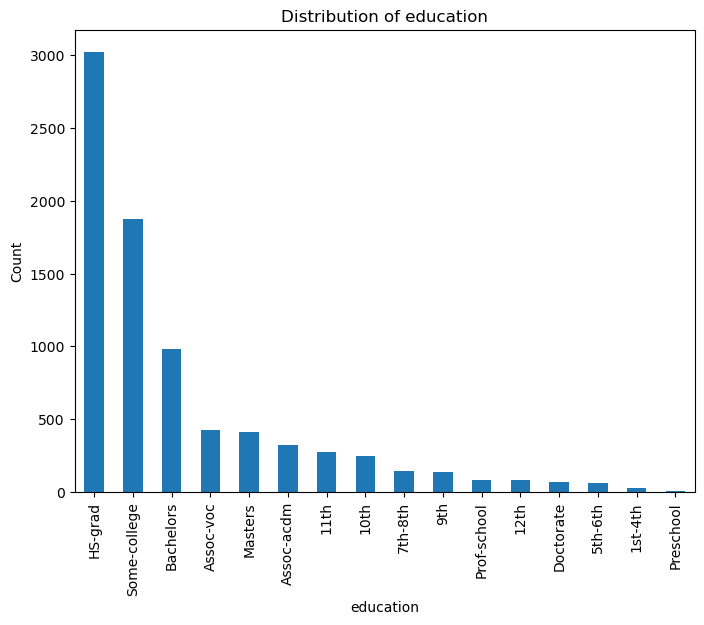

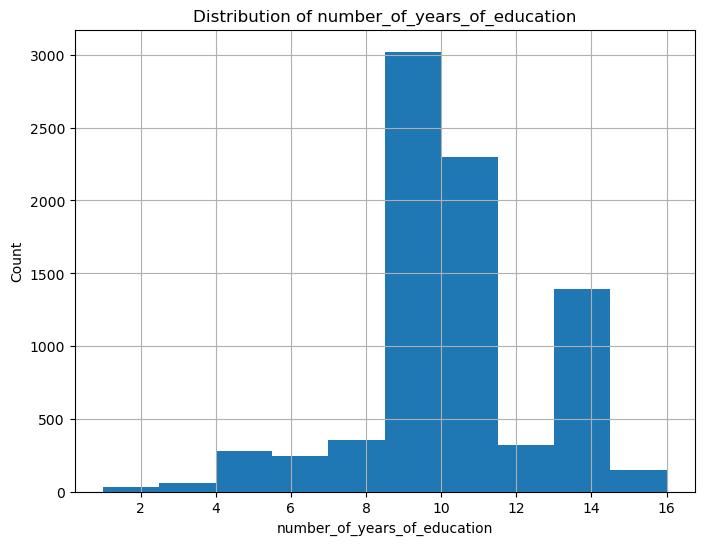

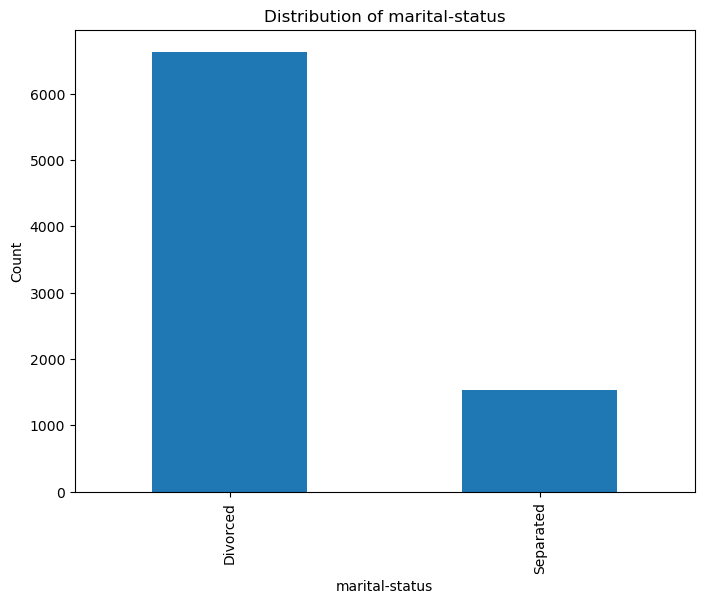

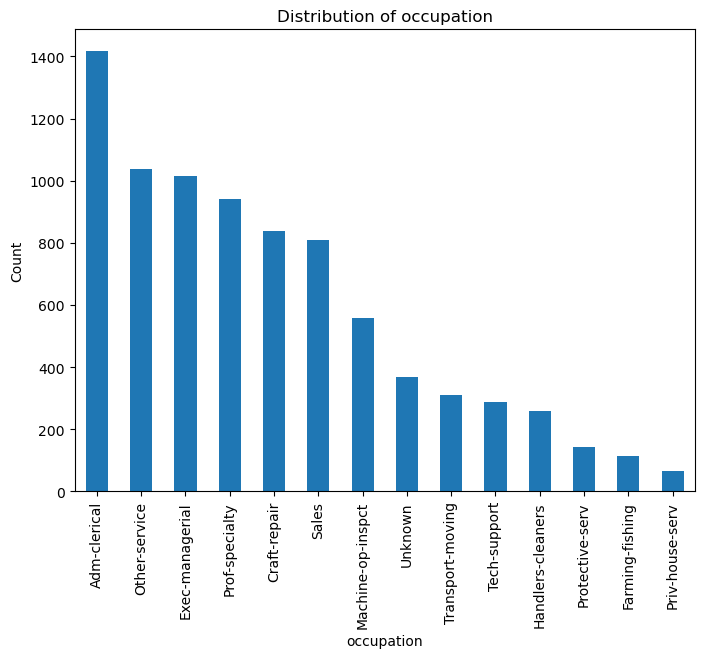

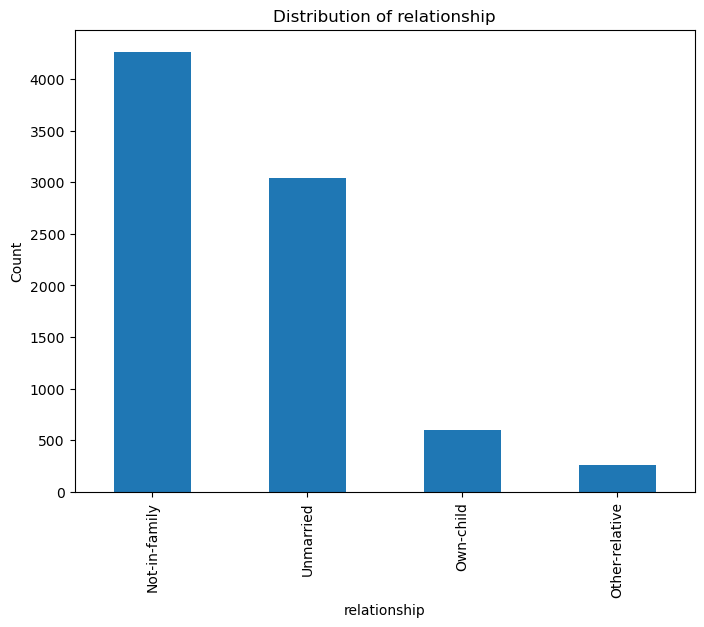

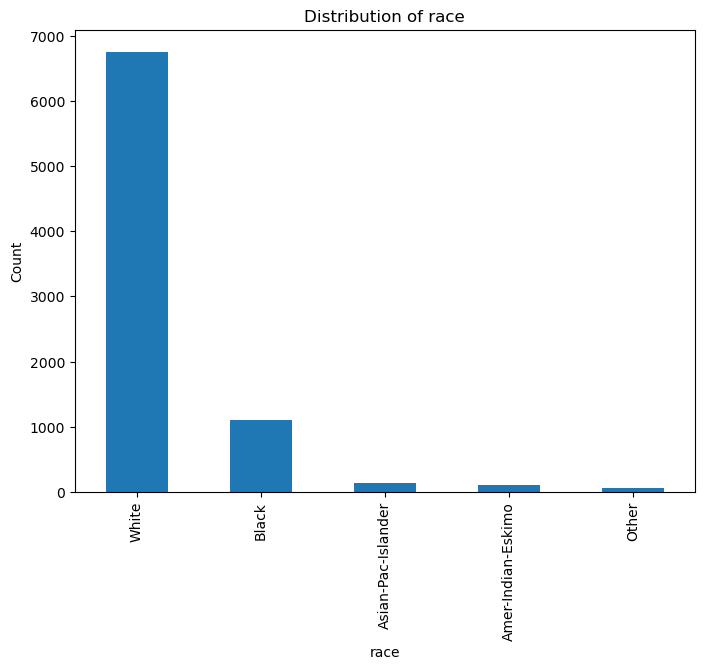

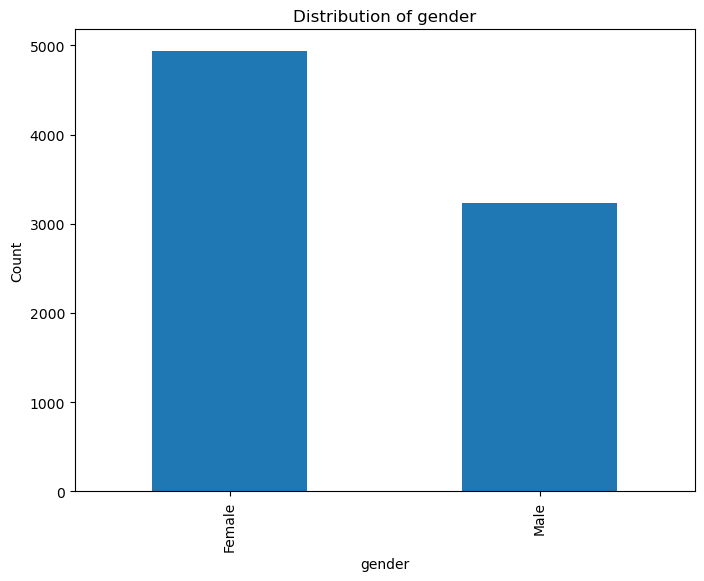

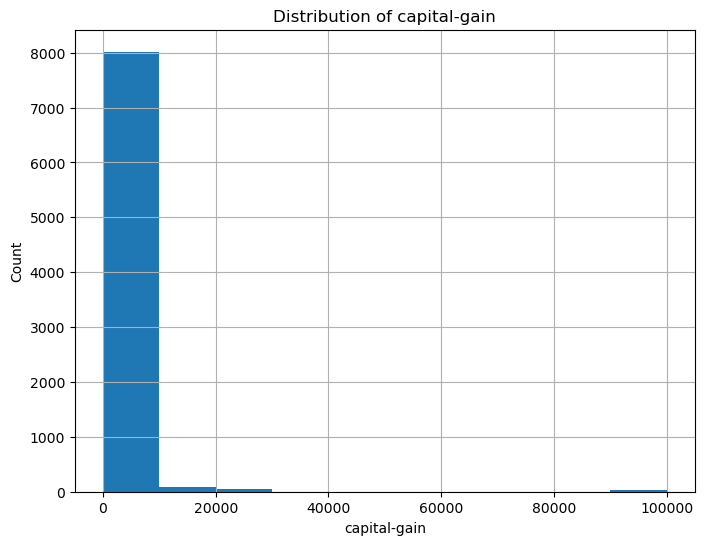

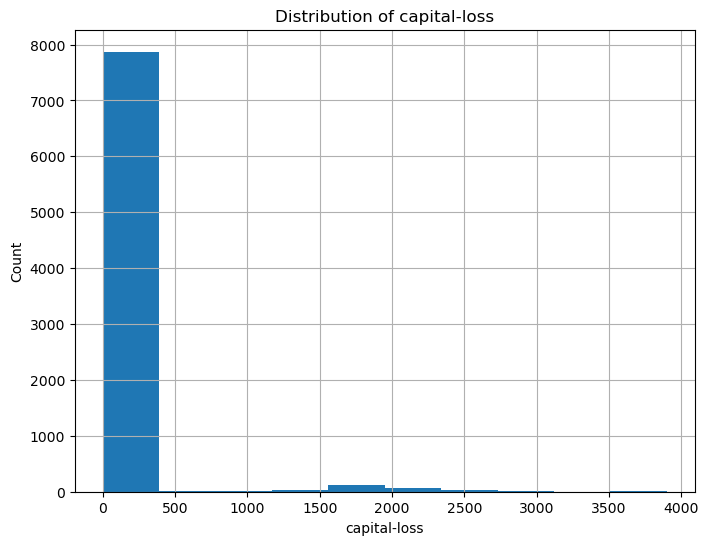

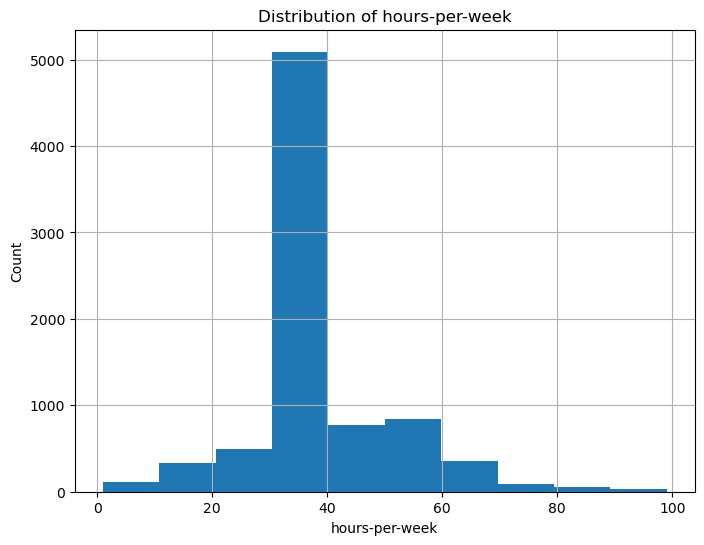

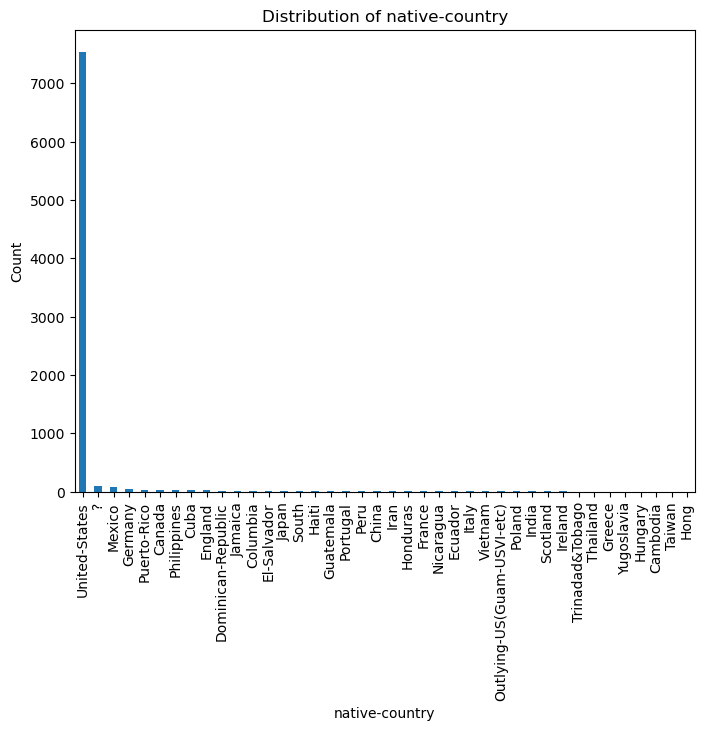

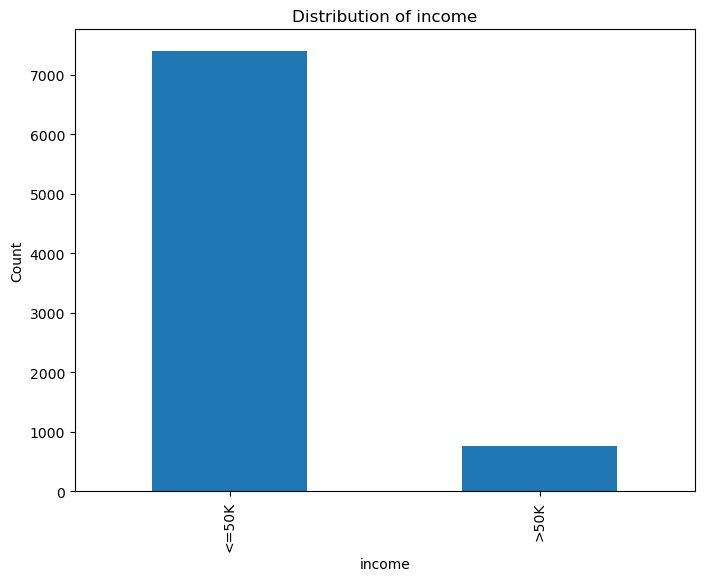

In [62]:
for column in df2_divorced_separated.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed

    if df2_divorced_separated[column].dtype == "object":  # Categorical variable
        df2_divorced_separated[column].value_counts().plot(kind="bar")
    else:  # Numerical variable
        df2_divorced_separated[column].hist()

    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [64]:
df2_divorced_separated["occupation"].unique()

array(['Unknown', 'Machine-op-inspct', 'Exec-managerial',
       'Priv-house-serv', 'Handlers-cleaners', 'Sales', 'Adm-clerical',
       'Transport-moving', 'Other-service', 'Prof-specialty',
       'Tech-support', 'Craft-repair', 'Protective-serv',
       'Farming-fishing'], dtype=object)

Text(0.5, 1.0, 'Distribution of Occupation\n(Highest Counts)')

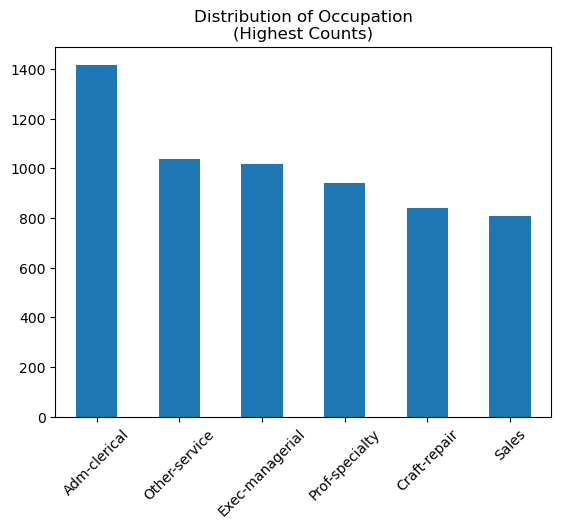

In [115]:
df_mask = df2_divorced_separated["occupation"].isin([
    'Adm-clerical','Other-service','Exec-managerial','Prof-specialty',
    'Craft-repair','Sales'])
_=df2_divorced_separated[df_mask]["occupation"].value_counts().sort_values(ascending=False).\
plot(kind='bar', rot=45)
plt.title("Distribution of Occupation\n(Highest Counts)")


In [105]:
df2_divorced_separated[df_mask]["occupation"].value_counts()

Adm-clerical       1416
Other-service      1037
Exec-managerial    1016
Prof-specialty      940
Craft-repair        839
Sales               810
Name: occupation, dtype: int64

Text(0.5, 1.0, 'Distribution of Income\n<=50k vs >50k')

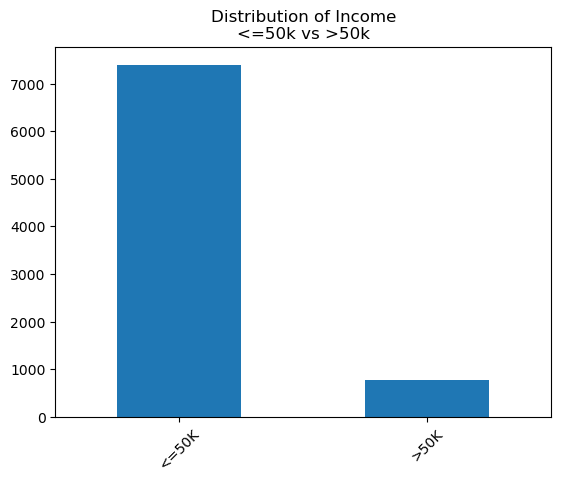

In [116]:
_=df2_divorced_separated["income"].value_counts().sort_values(ascending=False).\
plot(kind='bar', rot=45)
plt.title("Distribution of Income\n<=50k vs >50k")

Text(0.5, 1.0, 'Distribution of Education')

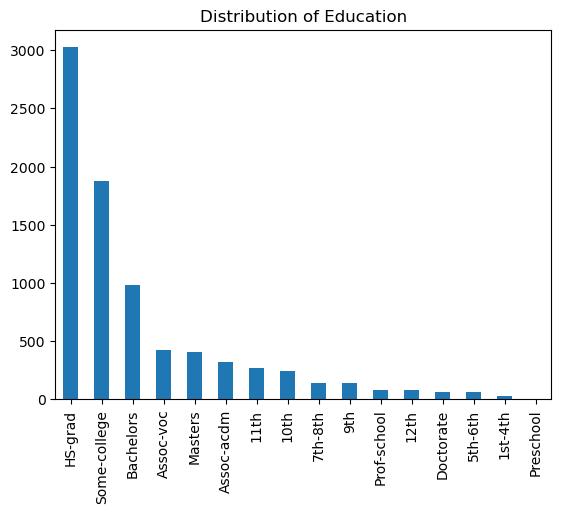

In [157]:
_=df2_divorced_separated["education"].value_counts().sort_values(ascending=False).\
plot(kind='bar', rot=90)
plt.title("Distribution of Education")

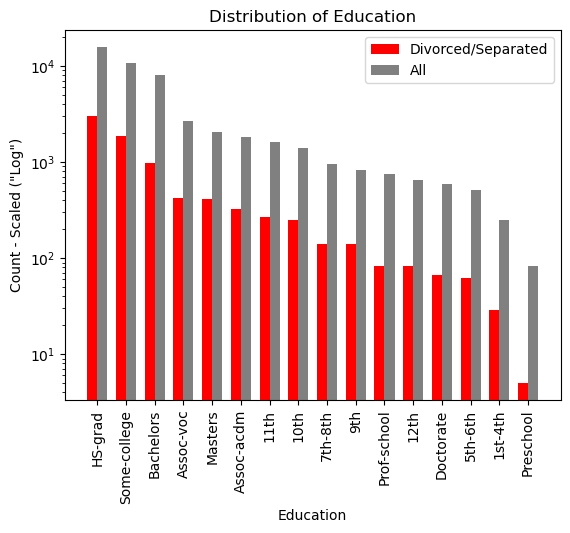

In [178]:
# Get value counts for education in both dataframes and sort them
counts_divorced_separated = df2_divorced_separated["education"].value_counts().sort_values(ascending=False)
counts_all = df2["education"].value_counts().sort_values(ascending=False)

# Plotting
bar_width = 0.35
index = range(len(counts_divorced_separated))

plt.bar(index, counts_divorced_separated, width=bar_width, label="Divorced/Separated", color='red')
plt.bar([i + bar_width for i in index], counts_all, width=bar_width, label="All", color='gray')

plt.xlabel("Education")
plt.ylabel("Count - Scaled (\"Log\")")
plt.yscale("log")
plt.title("Distribution of Education")
plt.xticks([i + bar_width/2 for i in index], counts_divorced_separated.index, rotation=90)
plt.legend()
plt.show()

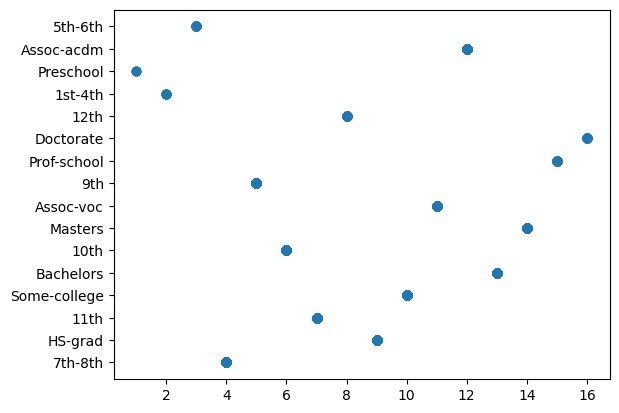

In [131]:
plt.scatter(df2_divorced_separated["number_of_years_of_education"],
            df2_divorced_separated["education"])

In [127]:
df2_divorced_separated.columns

Index(['age', 'work_type', 'fnlwgt', 'education',
       'number_of_years_of_education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

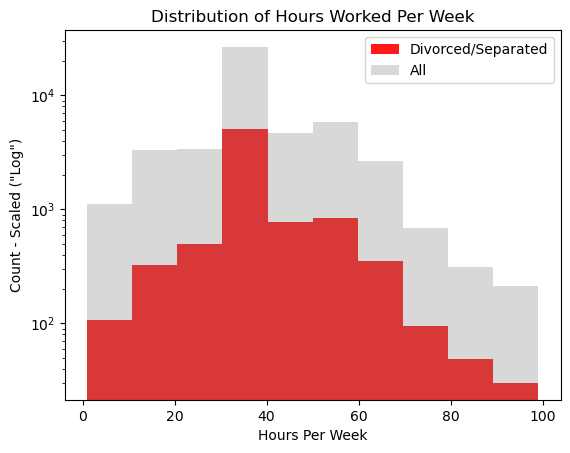

In [181]:
plt.hist(df2_divorced_separated["hours-per-week"], alpha=0.9, label="Divorced/Separated", color='red')
plt.hist(df2["hours-per-week"], alpha=0.3, label="All", color='gray')
plt.title("Distribution of Hours Worked Per Week")
plt.xlabel("Hours Per Week")
plt.ylabel("Count - Scaled (\"Log\")")
plt.yscale("log")
plt.legend()
plt.show()


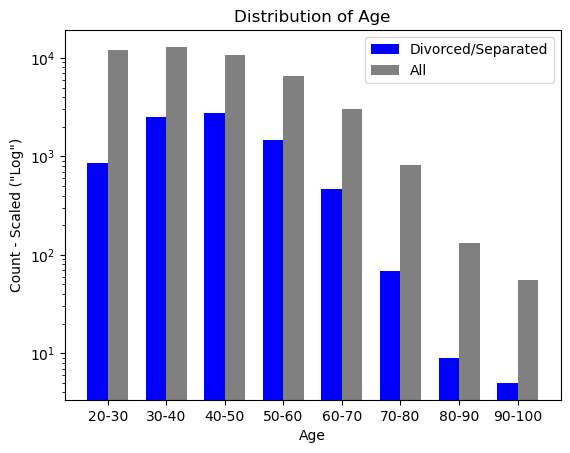

In [184]:
# Plotting
bar_width = 0.35
index = range(len(bins) - 1)

# Plot divorced/separated data
plt.bar(index, hist_divorced_separated, width=bar_width, label="Divorced/Separated", color='blue')

# Plot all data next to it, shifted by bar_width
plt.bar([i + bar_width for i in index], hist_all, width=bar_width, label="All", color='gray')

plt.xlabel("Age")
plt.ylabel("Count - Scaled (\"Log\")")
plt.yscale("log")
plt.title("Distribution of Age")
plt.xticks([i + bar_width/2 for i in index], [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)])
plt.legend()
plt.show()


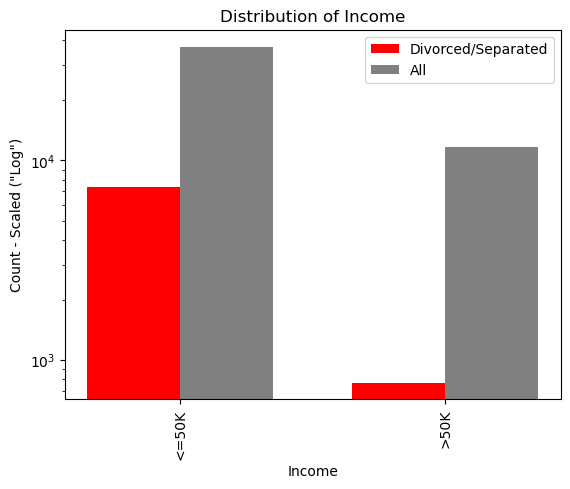

In [182]:
# Get value counts for education in both dataframes and sort them
counts_divorced_separated = df2_divorced_separated["income"].value_counts().sort_values(ascending=False)
counts_all = df2["income"].value_counts().sort_values(ascending=False)

# Plotting
bar_width = 0.35
index = range(len(counts_divorced_separated))

plt.bar(index, counts_divorced_separated, width=bar_width, label="Divorced/Separated", color='red')
plt.bar([i + bar_width for i in index], counts_all, width=bar_width, label="All", color='gray')

plt.xlabel("Income")
plt.ylabel("Count - Scaled (\"Log\")")
plt.yscale("log")
plt.title("Distribution of Income")
plt.xticks([i + bar_width/2 for i in index], counts_divorced_separated.index, rotation=90)
plt.legend()
plt.show()

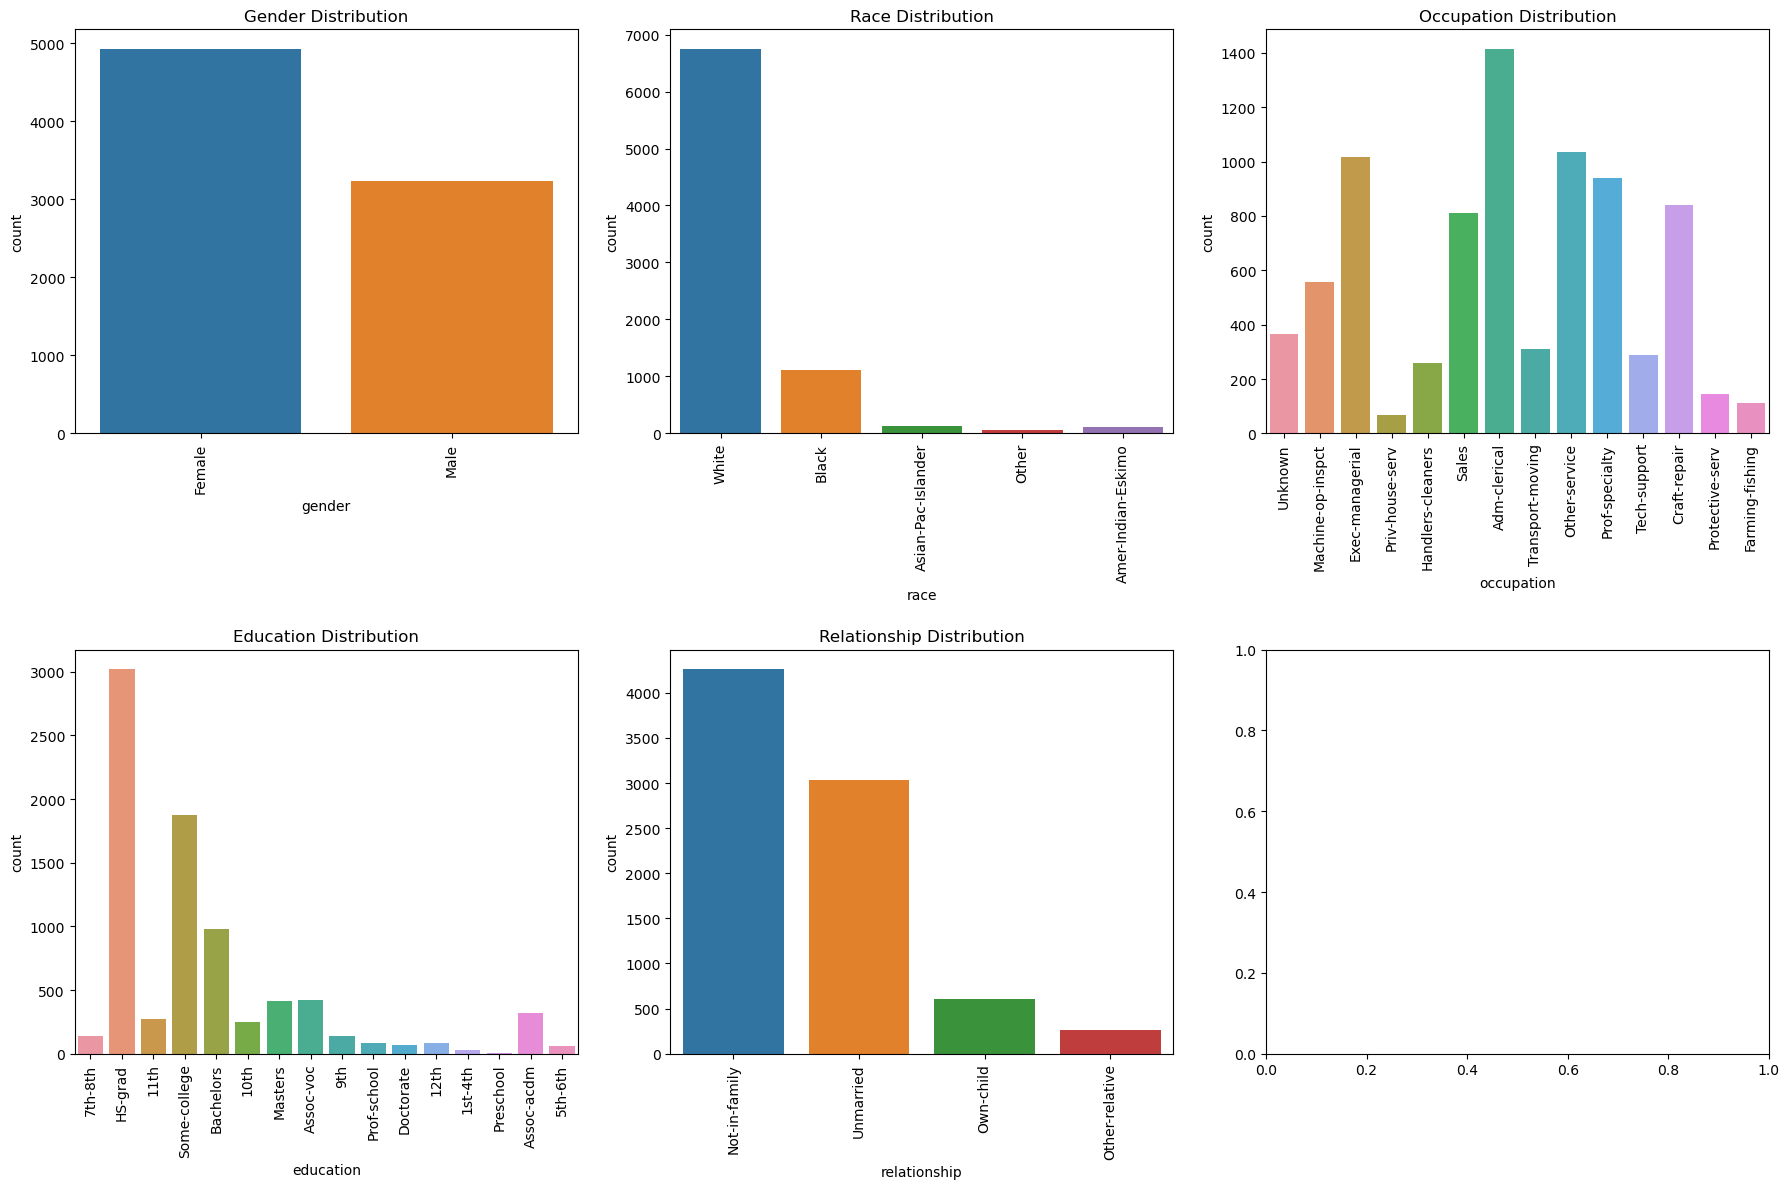

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Key Demographics for Divorced/Separated Couples
key_demographics = df_divorced_separated[['gender', 'race', 'occupation', 'education', 'relationship']]

# Set up subplots with more space
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Iterate through selected demographic columns and create bar plots
for i, column in enumerate(key_demographics.columns):
    sns.countplot(x=column, data=key_demographics, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'{column.capitalize()} Distribution')
    axes[i // 3, i % 3].tick_params(axis='x', rotation=90)  # Rotate x-labels

# Adjust layout with more space
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()


In [195]:
# Filter DataFrame for divorced/separated couples
df_divorced_separated = df2_divorced_separated[df2_divorced_separated["marital-status"].isin(["Divorced", "Separated"])]

# Find highest values for Administrative-Clerical count
highest_admin_clerical = df_divorced_separated[df_divorced_separated["occupation"] == "Adm-clerical"]["occupation"].count()

# Find highest values for HS-Grad count
highest_hs_grad = df_divorced_separated[df_divorced_separated["education"] == "HS-grad"]["education"].count()

# Find highest values for 40-50 age count
highest_40_50_age = df_divorced_separated[(df_divorced_separated["age"] >= 40) & (df_divorced_separated["age"] <= 50)]["age"].count()

# Find highest values for Income <=50k count
highest_income_50k = df_divorced_separated[df_divorced_separated["income"] == "<=50K"]["income"].count()

# Print or use these values as needed
print("Highest Administrative-Clerical count:", highest_admin_clerical)
print("Highest HS-Grad count:", highest_hs_grad)
print("Highest 40-50 age count:", highest_40_50_age)
print("Highest Income <=50k count:", highest_income_50k)


Highest Administrative-Clerical count: 1416
Highest HS-Grad count: 3023
Highest 40-50 age count: 2953
Highest Income <=50k count: 7393
